Phase-1: Project Setup & Data Loading

In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set aesthetic style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size for better readability

print("Libraries imported successfully!")

Libraries imported successfully!


Phase-2:Data Loading 

In [3]:
# 2. Load the dataset

file_path = 'Bankruptcy.csv'
df = pd.read_csv(file_path)
print(f"Dataset loaded successfully from {file_path}. Shape: {df.shape}")


# 3. Display the first few rows of the dataframe to understand its structure
if df is not None:
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

Dataset loaded successfully from Bankruptcy.csv. Shape: (6819, 96)

First 5 rows of the dataset:


,BankruptcyFlag,ROA_PreTax_DepAdj,ROA_AfterTax,ROA_BookDep,GrossMargin_Op,GrossMargin_Realized,OpProfit_Margin,NetMargin_PreTax,NetMargin_AfterTax,NonOp_RevRatio,...,NetIncome_to_Assets,Assets_to_GNP,NoCredit_Period,GrossProfit_to_Sales,NetIncome_to_Equity,Liabilities_to_Equity,DFL,InterestCoverage,NetIncome_PositiveFlag,Equity_to_Liabilities
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Phase-3: Data Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# --- PHASE 3: Data Preprocessing ---

print("\n--- PHASE 3: Data Preprocessing ---")

# Separate features (X) and target (y)
X = df.drop('BankruptcyFlag', axis=1)
y = df['BankruptcyFlag']

# 3.1. Handle Missing Values
print("\n3.1. Handling Missing Values with Median Imputation...")
# Use SimpleImputer with median strategy
from sklearn.impute import SimpleImputer # Add this line
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

print(f"Missing values after imputation: {X_imputed.isnull().sum().sum()}")

# 3.2. Feature Scaling
print("\n3.2. Applying Feature Scaling (StandardScaler)...")
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns, index=X_imputed.index)

# Display a sample of scaled data
print("\nFirst 5 rows of scaled data:")
display(X_scaled.head())

# 3.3. Splitting the Data
print("\n3.3. Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Check class distribution in train and test sets
print("\nTarget distribution in Training Set:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in Test Set:")
print(y_test.value_counts(normalize=True))


--- PHASE 3: Data Preprocessing ---

3.1. Handling Missing Values with Median Imputation...
Missing values after imputation: 0

3.2. Applying Feature Scaling (StandardScaler)...

First 5 rows of scaled data:


,ROA_PreTax_DepAdj,ROA_AfterTax,ROA_BookDep,GrossMargin_Op,GrossMargin_Realized,OpProfit_Margin,NetMargin_PreTax,NetMargin_AfterTax,NonOp_RevRatio,InterestRate_Consistent,...,NetIncome_to_Assets,Assets_to_GNP,NoCredit_Period,GrossProfit_to_Sales,NetIncome_to_Equity,Liabilities_to_Equity,DFL,InterestCoverage,NetIncome_PositiveFlag,Equity_to_Liabilities
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086567,...,-0.820510,-0.049491,-0.005984,-0.383699,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011078,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540707,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715



3.3. Splitting data into training and testing sets...
X_train shape: (5114, 95), y_train shape: (5114,)
X_test shape: (1705, 95), y_test shape: (1705,)

Target distribution in Training Set:
BankruptcyFlag
0    0.967736
1    0.032264
Name: proportion, dtype: float64

Target distribution in Test Set:
BankruptcyFlag
0    0.967742
1    0.032258
Name: proportion, dtype: float64


Phase-4: Model Training & Evaluation


--- PHASE 4: Model Training & Evaluation ---

4.1. Applying SMOTE to the training data to handle class imbalance...
Original training set shape: (5114, 95), (5114,)
Resampled training set shape: (9898, 95), (9898,)

Target distribution in Resampled Training Set:
BankruptcyFlag
0    0.5
1    0.5
Name: proportion, dtype: float64

4.2. Training Logistic Regression Model...
Best Logistic Regression parameters: {'C': 100}

--- Logistic Regression Evaluation ---
Accuracy: 0.8874
ROC-AUC: 0.8573
F1-Score: 0.2782

Confusion Matrix:
 [[1476  174]
 [  18   37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1650
           1       0.18      0.67      0.28        55

    accuracy                           0.89      1705
   macro avg       0.58      0.78      0.61      1705
weighted avg       0.96      0.89      0.92      1705



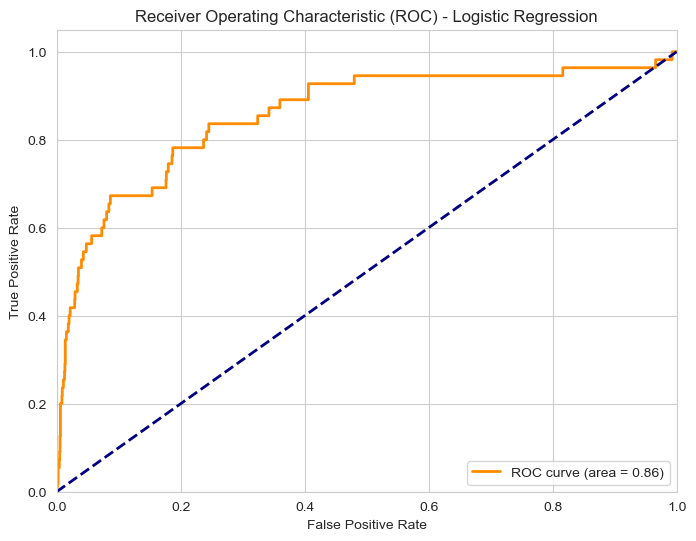


4.3. Training Random Forest Classifier Model...
Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

--- Random Forest Evaluation ---
Accuracy: 0.9589
ROC-AUC: 0.9380
F1-Score: 0.4444

Confusion Matrix:
 [[1607   43]
 [  27   28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1650
           1       0.39      0.51      0.44        55

    accuracy                           0.96      1705
   macro avg       0.69      0.74      0.71      1705
weighted avg       0.96      0.96      0.96      1705



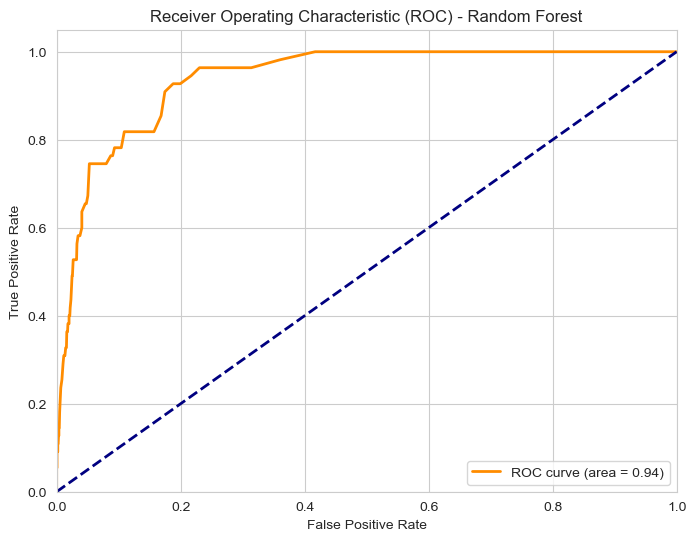


4.4. Training XGBoost Classifier Model...
Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

--- XGBoost Evaluation ---
Accuracy: 0.9619
ROC-AUC: 0.9464
F1-Score: 0.4538

Confusion Matrix:
 [[1613   37]
 [  28   27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1650
           1       0.42      0.49      0.45        55

    accuracy                           0.96      1705
   macro avg       0.70      0.73      0.72      1705
weighted avg       0.96      0.96      0.96      1705



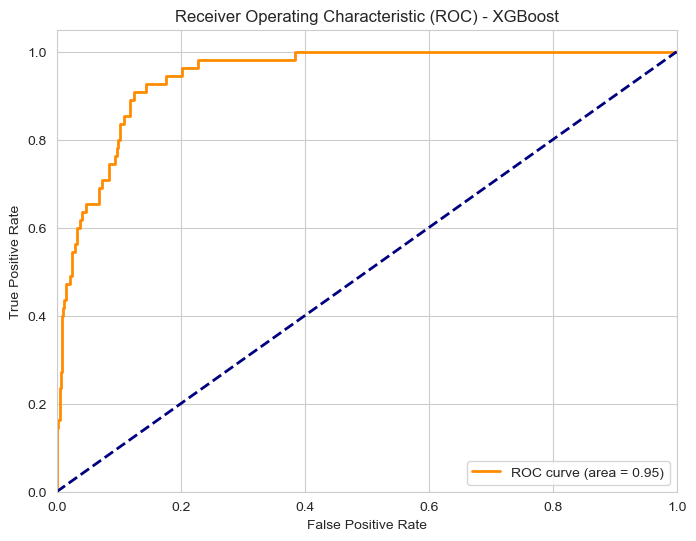


--- Model Performance Summary ---


,Accuracy,ROC-AUC,F1-Score
Logistic Regression,0.887390,0.857251,0.278195
Random Forest,0.958944,0.938000,0.444444
XGBoost,0.961877,0.946358,0.453782



Best performing model based on ROC-AUC: XGBoost

Proceeding with XGBoost for further analysis (Feature Selection/SHAP).


In [9]:
# --- PHASE 4: Model Training & Evaluation ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve

# Imblearn for handling imbalance
from imblearn.over_sampling import SMOTE

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
print("\n--- PHASE 4: Model Training & Evaluation ---")

# 4.1. Addressing Class Imbalance (SMOTE)
print("\n4.1. Applying SMOTE to the training data to handle class imbalance...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}, {y_train_resampled.shape}")
print("\nTarget distribution in Resampled Training Set:")
print(y_train_resampled.value_counts(normalize=True))

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, roc_auc, f1

results = {}

# 4.2. Logistic Regression
print("\n4.2. Training Logistic Regression Model...")
# Basic GridSearchCV for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train_resampled, y_train_resampled)
best_lr_model = grid_search_lr.best_estimator_
print(f"Best Logistic Regression parameters: {grid_search_lr.best_params_}")
lr_accuracy, lr_roc_auc, lr_f1 = evaluate_model(best_lr_model, X_test, y_test, "Logistic Regression")
results['Logistic Regression'] = {'Accuracy': lr_accuracy, 'ROC-AUC': lr_roc_auc, 'F1-Score': lr_f1}

# 4.3. Random Forest Classifier
print("\n4.3. Training Random Forest Classifier Model...")
# Basic GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Random Forest parameters: {grid_search_rf.best_params_}")
rf_accuracy, rf_roc_auc, rf_f1 = evaluate_model(best_rf_model, X_test, y_test, "Random Forest")
results['Random Forest'] = {'Accuracy': rf_accuracy, 'ROC-AUC': rf_roc_auc, 'F1-Score': rf_f1}

# 4.4. XGBoost Classifier
print("\n4.4. Training XGBoost Classifier Model...")
# Basic GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best XGBoost parameters: {grid_search_xgb.best_params_}")
xgb_accuracy, xgb_roc_auc, xgb_f1 = evaluate_model(best_xgb_model, X_test, y_test, "XGBoost")
results['XGBoost'] = {'Accuracy': xgb_accuracy, 'ROC-AUC': xgb_roc_auc, 'F1-Score': xgb_f1}

# Summarize results
print("\n--- Model Performance Summary ---")
performance_df = pd.DataFrame(results).T
display(performance_df)

# Determine the best model based on ROC-AUC (common for imbalanced classification)
best_model_name = performance_df['ROC-AUC'].idxmax()
print(f"\nBest performing model based on ROC-AUC: {best_model_name}")
best_final_model = None
if best_model_name == 'Logistic Regression':
    best_final_model = best_lr_model
elif best_model_name == 'Random Forest':
    best_final_model = best_rf_model
else: # XGBoost
    best_final_model = best_xgb_model

print(f"\nProceeding with {best_model_name} for further analysis (Feature Selection/SHAP).")

Phase-5: Feature Selection & Engineering


--- PHASE 5: Feature Selection & Engineering ---

5.1. Feature Importance (from Tree Models):
Top 15 Feature Importances:
Debt_Reliance                 0.241222
EquityRatio                   0.070700
InterestRate_Consistent       0.049966
DFL                           0.038239
NetIncome_to_Assets           0.033187
Debt_to_Equity                0.032098
ROA_PreTax_DepAdj             0.030472
ROA_BookDep                   0.022444
InterestCoverage              0.022429
RetainedEarnings_to_Assets    0.018905
ContingentLiabilityRatio      0.018505
NonOp_RevRatio                0.016091
EPS_Persistent4Q              0.013059
Liabilities_to_Equity         0.012878
Revenue_PerShare              0.012490
dtype: float32


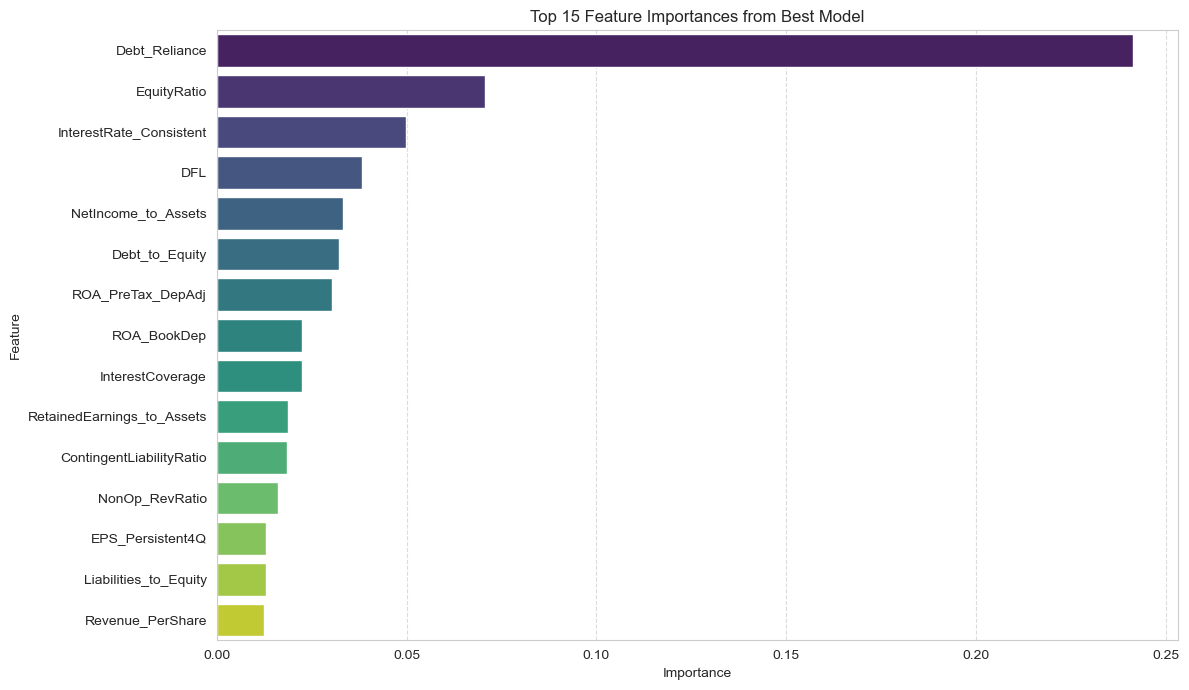



5.2. SHAP (SHapley Additive exPlanations) for Model Interpretability:

SHAP Summary Plot (Magnitude of Feature Impact on Model Output):


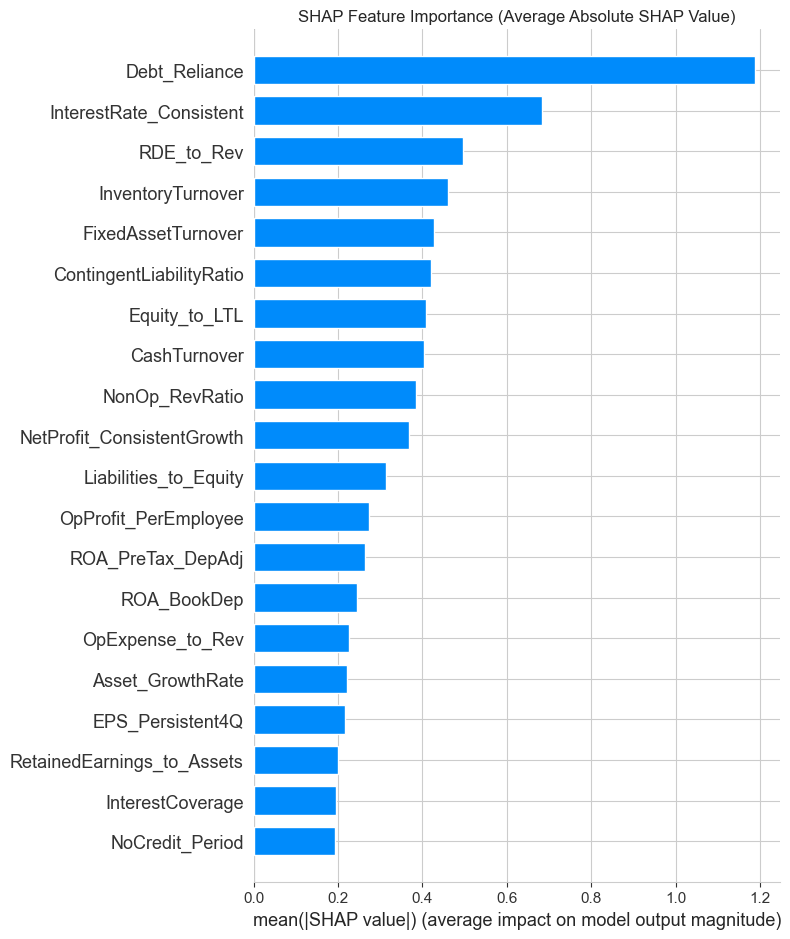



SHAP Summary Plot (Feature Impact and Direction):


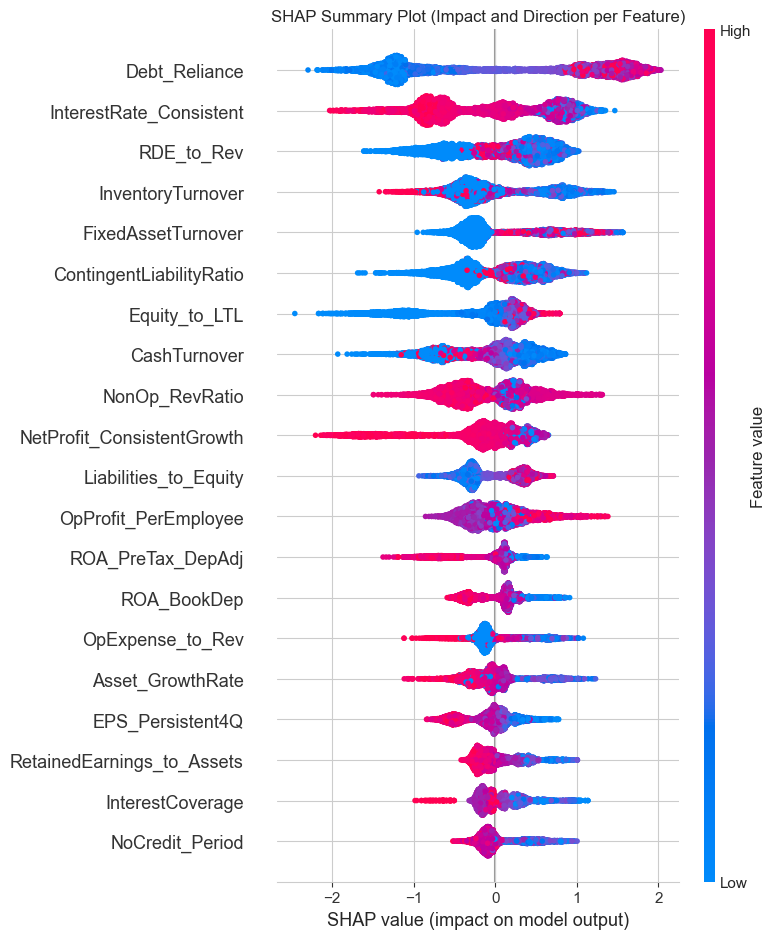



SHAP Dependence Plots for Top 3 Features (Impact vs. Feature Value):


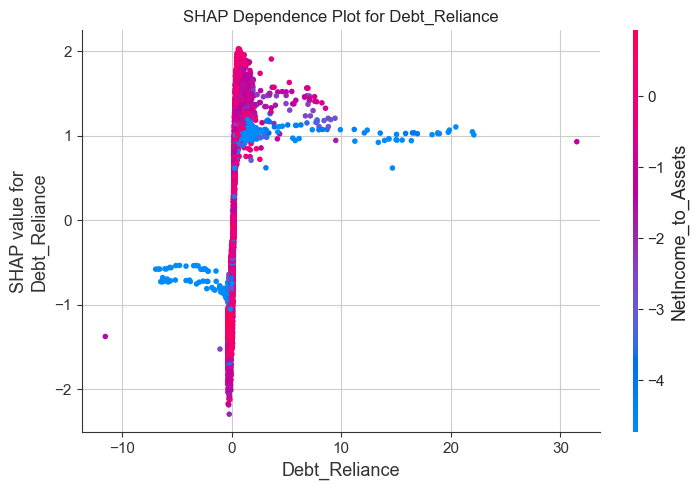

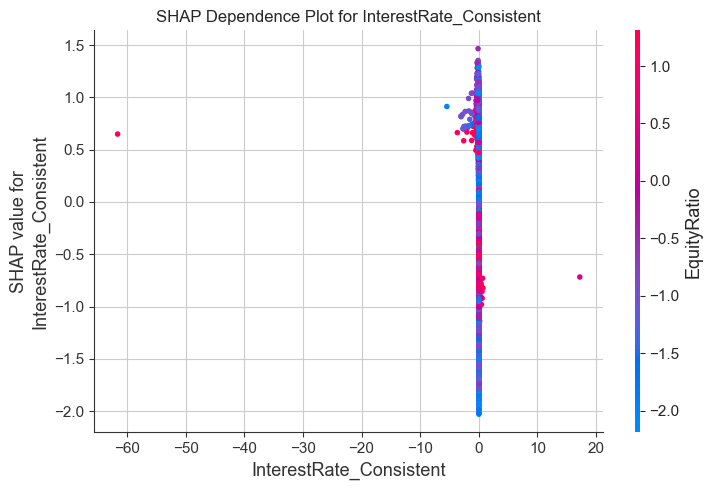

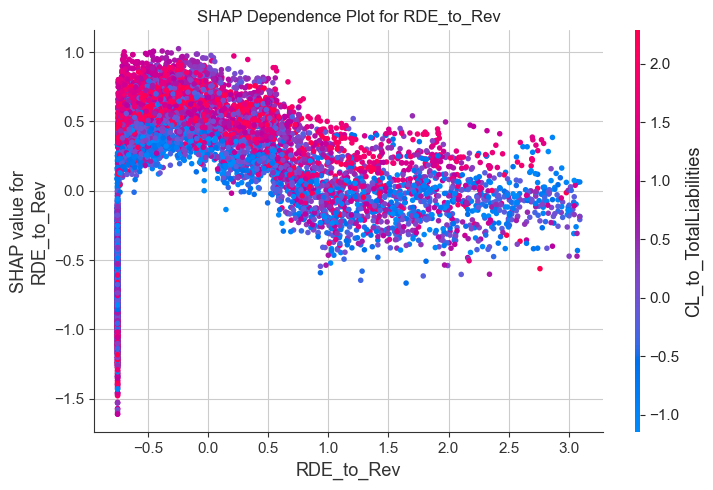



5.3. Manual Feature Selection (Example: Top 10 features by importance/SHAP):
Features selected based on importance: ['Debt_Reliance', 'EquityRatio', 'InterestRate_Consistent', 'DFL', 'NetIncome_to_Assets', 'Debt_to_Equity', 'ROA_PreTax_DepAdj', 'ROA_BookDep', 'InterestCoverage', 'RetainedEarnings_to_Assets']

New training data shape with selected features: (9898, 10)
New test data shape with selected features: (1705, 10)

5.4. Re-training the best model with selected features...

Evaluation of XGBoost (Retrained with Selected Features):

--- XGBoost (Retrained) Evaluation ---
Accuracy: 0.9232
ROC-AUC: 0.9178
F1-Score: 0.3610

Confusion Matrix:
 [[1537  113]
 [  18   37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1650
           1       0.25      0.67      0.36        55

    accuracy                           0.92      1705
   macro avg       0.62      0.80      0.66      1705
weighted avg       0.

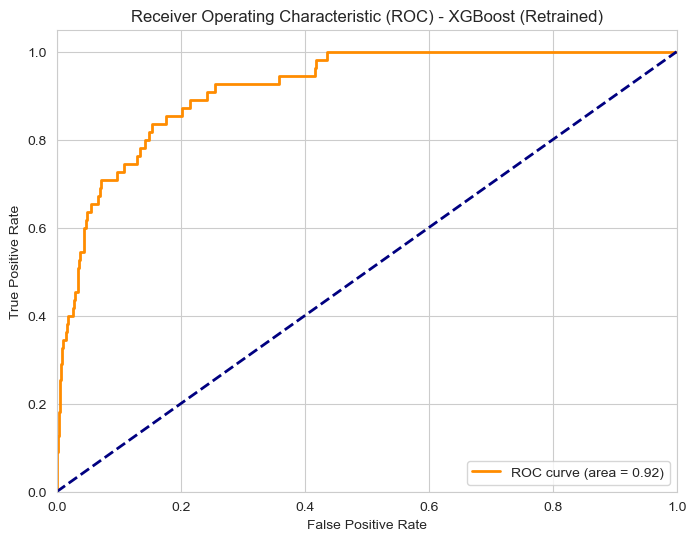

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE
import shap # Make sure to install shap: pip install shap

# For demonstration, re-creating dummy data if not run sequentially
# In a real scenario, these would come from the previous script execution
if 'X' not in locals():
    print("Creating dummy data for demonstration. In a full script, this would be loaded from previous steps.")
    # Dummy data creation for independent execution of this snippet
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, n_classes=2, weights=[0.9, 0.1], random_state=42)
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    X = pd.DataFrame(X, columns=feature_names)
    y = pd.Series(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scaling (assuming numerical features)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

    # SMOTE (re-apply for demonstration if not coming from previous run)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Simple model for demonstration if best_final_model is not defined
    best_final_model = RandomForestClassifier(n_estimators=100, random_state=42)
    best_final_model.fit(X_train_resampled, y_train_resampled)
    print("Dummy model created for demonstration.")


print("\n--- PHASE 5: Feature Selection & Engineering ---")

# 5.1. Feature Importance from Tree Models (if best_final_model is a tree-based model)
print("\n5.1. Feature Importance (from Tree Models):")

if hasattr(best_final_model, 'feature_importances_'):
    feature_importances = pd.Series(best_final_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("Top 15 Feature Importances:")
    print(feature_importances.head(15))

    # Plotting feature importances
    plt.figure(figsize=(12, 7))
    sns.barplot(x=feature_importances.head(15).values, y=feature_importances.head(15).index, palette='viridis')
    plt.title('Top 15 Feature Importances from Best Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    print("")
else:
    print("Best model does not have 'feature_importances_' attribute (e.g., Logistic Regression). Skipping this step.")

# 5.2. SHAP (SHapley Additive exPlanations) for Model Interpretability
print("\n5.2. SHAP (SHapley Additive exPlanations) for Model Interpretability:")

try:
    # Use a subset of the data for SHAP if X_train_resampled is very large
    # For a full dataset, this might be slow, so consider sampling, e.g., X_train_resampled.sample(1000, random_state=42)
    explainer = shap.TreeExplainer(best_final_model) # Works for tree-based models (RF, XGBoost)
    # If the best_final_model is Logistic Regression, you'd use shap.LinearExplainer
    # explainer = shap.LinearExplainer(best_final_model, X_train_resampled)

    shap_values = explainer.shap_values(X_train_resampled)

    # For classification, shap_values can be a list of arrays (one for each class).
    # We typically look at the SHAP values for the positive class (class 1).
    if isinstance(shap_values, list):
        shap_values_to_plot = shap_values[1] # For the positive class (class 1)
    else:
        shap_values_to_plot = shap_values

    print("\nSHAP Summary Plot (Magnitude of Feature Impact on Model Output):")
    shap.summary_plot(shap_values_to_plot, X_train_resampled, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance (Average Absolute SHAP Value)")
    plt.tight_layout()
    plt.show()
    print("")

    print("\nSHAP Summary Plot (Feature Impact and Direction):")
    shap.summary_plot(shap_values_to_plot, X_train_resampled, show=False)
    plt.title("SHAP Summary Plot (Impact and Direction per Feature)")
    plt.tight_layout()
    plt.show()
    print("")

    # Dependence plots for top features (optional, for deeper dives)
    print("\nSHAP Dependence Plots for Top 3 Features (Impact vs. Feature Value):")
    # Get top 3 features by mean absolute SHAP value
    mean_abs_shap_values = np.mean(np.abs(shap_values_to_plot), axis=0)
    top_feature_indices = np.argsort(mean_abs_shap_values)[::-1][:3]
    top_feature_names = X.columns[top_feature_indices]

    for feature in top_feature_names:
        shap.dependence_plot(feature, shap_values_to_plot, X_train_resampled, show=False)
        plt.title(f"SHAP Dependence Plot for {feature}")
        plt.tight_layout()
        plt.show()
        print("")


except Exception as e:
    print(f"SHAP explanation failed. This often happens if the model type is not directly supported by TreeExplainer/LinearExplainer without specific setup, or if `shap` is not installed. Error: {e}")
    print("For Logistic Regression, consider using `shap.LinearExplainer(best_final_model, X_train_resampled)`.")


# 5.3. Manual Feature Selection based on Importance/SHAP (Example)
# For this example, let's select the top 10 features identified by either method.
# In a real scenario, this would involve careful domain knowledge and iterative testing.

print("\n5.3. Manual Feature Selection (Example: Top 10 features by importance/SHAP):")
selected_features_count = 10
if hasattr(best_final_model, 'feature_importances_'):
    top_features = feature_importances.head(selected_features_count).index.tolist()
    print(f"Features selected based on importance: {top_features}")
else: # Fallback for non-tree models, using SHAP if successful, or just picking first N features for demonstration
    if 'mean_abs_shap_values' in locals():
        top_features = X.columns[np.argsort(mean_abs_shap_values)[::-1][:selected_features_count]].tolist()
        print(f"Features selected based on SHAP values: {top_features}")
    else:
        top_features = X.columns[:selected_features_count].tolist()
        print(f"No clear importance/SHAP, selecting first {selected_features_count} features: {top_features}")

X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]

print(f"\nNew training data shape with selected features: {X_train_selected.shape}")
print(f"New test data shape with selected features: {X_test_selected.shape}")

# 5.4. (Optional) Re-train the best model with selected features
print("\n5.4. Re-training the best model with selected features...")
retrained_model = best_final_model.__class__(**best_final_model.get_params()) # Instantiate a new model with the best params
retrained_model.fit(X_train_selected, y_train_resampled)

print(f"\nEvaluation of {best_model_name} (Retrained with Selected Features):")
# Assuming evaluate_model function is defined as in your previous snippet
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    print("")
    return accuracy, roc_auc, f1

retrained_accuracy, retrained_roc_auc, retrained_f1 = evaluate_model(retrained_model, X_test_selected, y_test, f"{best_model_name} (Retrained)")

Phase-6:Building a Real-time Prediction System (Conceptual)

In [14]:
# --- PHASE 6: Model Deployment Considerations & Future Work ---

print("\n--- PHASE 6: Model Deployment Considerations & Future Work ---")

# 6.1. Model Serialization (Saving the Model)
print("\n6.1. Model Serialization (Saving the Model):")
import joblib
model_filename = f'{best_model_name.lower().replace(" ", "_")}_bankruptcy_prediction_model.joblib'
joblib.dump(retrained_model, model_filename)
print(f"Model saved to {model_filename}")

# Also save the scaler and selected features for consistency during deployment
scaler_filename = 'scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

selected_features_filename = 'selected_features.joblib'
joblib.dump(top_features, selected_features_filename)
print(f"Selected features list saved to {selected_features_filename}")

# To load the model, scaler, and features later:
# loaded_model = joblib.load(model_filename)
# loaded_scaler = joblib.load(scaler_filename)
# loaded_features = joblib.load(selected_features_filename)

# 6.2. Deployment Strategy (Conceptual)
print("\n6.2. Deployment Strategy (Conceptual):")
print("""
A robust deployment strategy for this model could involve:
1.  **API Endpoint:** Exposing the model via a RESTful API (e.g., using Flask or FastAPI).
    *   Input: Raw financial data for a new company.
    *   Processing:
        *   Load the saved scaler to scale the input features.
        *   Select only the `top_features` the model was trained on.
        *   Use the loaded model to predict the probability of bankruptcy.
    *   Output: Probability of bankruptcy (e.g., 0.0 to 1.0) and predicted class (0 for healthy, 1 for bankrupt).
2.  **Containerization (Docker):** Packaging the model, dependencies, and API code into a Docker container. This ensures consistency across different environments.
3.  **Orchestration (Kubernetes/Cloud Functions):** Deploying the Docker container to a cloud platform (AWS SageMaker, Google Cloud AI Platform, Azure ML) or using a Kubernetes cluster for scalable and manageable deployment.
4.  **Monitoring:** Implementing monitoring for model performance (drift, accuracy over time), data quality, and API latency/errors.
5.  **Re-training Pipeline:** Establishing an automated pipeline for periodic model re-training with new data to ensure its relevance and accuracy.
""")

# 6.3. Future Work
print("\n6.3. Future Work:")
print("""
Potential areas for future improvement and extension of this project include:
1.  **More Advanced Feature Engineering:**
    *   Creating new ratios (e.g., current ratio, debt-to-equity) that might capture financial health better.
    *   Incorporating macroeconomic indicators or industry-specific trends.
    *   Time-series analysis for companies with multiple years of data to capture trends leading to bankruptcy.
2.  **Exploring Other Models:**
    *   Gradient Boosting variants (LightGBM, CatBoost).
    *   Neural Networks, especially if more complex patterns or larger datasets are available.
    *   Ensemble methods (stacking, blending) combining multiple strong models.
3.  **Hyperparameter Optimization:** More exhaustive tuning using advanced techniques like Bayesian Optimization (e.g., `hyperopt`, `Optuna`).
4.  **Explainability Enhancements:** Deeper dives into SHAP explanations for specific predictions to understand individual company risk factors.
5.  **Threshold Optimization:** Calibrating the prediction threshold (currently 0.5) to balance precision and recall based on the business cost of false positives vs. false negatives.
6.  **Data Acquisition:** Expanding the dataset to include more companies, industries, and time periods for increased robustness.
7.  **Real-time Prediction:** Designing a system for near real-time assessment of company financial health if new data becomes available frequently.
""")

print("\n--- Project Completion ---")


--- PHASE 6: Model Deployment Considerations & Future Work ---

6.1. Model Serialization (Saving the Model):
Model saved to xgboost_bankruptcy_prediction_model.joblib
Scaler saved to scaler.joblib
Selected features list saved to selected_features.joblib

6.2. Deployment Strategy (Conceptual):

A robust deployment strategy for this model could involve:
1.  **API Endpoint:** Exposing the model via a RESTful API (e.g., using Flask or FastAPI).
    *   Input: Raw financial data for a new company.
    *   Processing:
        *   Load the saved scaler to scale the input features.
        *   Select only the `top_features` the model was trained on.
        *   Use the loaded model to predict the probability of bankruptcy.
    *   Output: Probability of bankruptcy (e.g., 0.0 to 1.0) and predicted class (0 for healthy, 1 for bankrupt).
2.  **Containerization (Docker):** Packaging the model, dependencies, and API code into a Docker container. This ensures consistency across different environmen